# Visualização de Dados com plotnine e ggplot no Python

Quando temos interesse em analisar dados e resolver um problema de negócio, logo pensamos nas possíveis tendências e correlações que as variáveis de estudo podem ter. Essa é uma etapa muito importante pois após a formatação e manipulação dos dados brutos, é possível comparar as hipóteses formuladas por nós com as informações que são obtidas por meio de estatísticas e visualizações de dados.

Mas o que é **Visualização de Dados?**

- Em resumo, visualização de dados é a representação dos dados em formato *gráfico*.

Mas o que é um **gráfico?**

- **Gráfico** é uma representação com forma geométrica e que é construída a partir de informações obtidas dos dados. Isso significa que o gráfico é um desenho que tem dimensões, forma, tamanho, comprimento, área, volume, etc.

Essas definições estão bem alinhadas com o livro [The Grammar of Graphics](https://www.amazon.com.br/Grammar-Graphics-Leland-Wilkinson/dp/0387245448)
 de [Leland Wilkinson](https://en.wikipedia.org/wiki/Leland_Wilkinson), no qual o autor define um esquema geral para visualização de dados que divide os gráficos em componentes estéticas de objetos geométricos.

A partir desses conceitos, [Hadley Wickham](http://hadley.nz/) escreveu [A Layered Grammar of Graphics](http://vita.had.co.nz/papers/layered-grammar.html) e criou o [ggplot2](https://ggplot2.tidyverse.org/), um pacote de visualização de dados para a linguagem de programação estatística R.

Apesar do pacote ter sido feito inicialmente para o R.....

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

______________________________________________________________________

## plotnine

In [3]:
from plotnine import *
from plotnine.data import diamonds as plotnine_diamonds

In [4]:
plotnine_diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## 1.1 Construção dos primeiros gráficos

A estrutura padrão dos gráficos em ggplot2 segue a forma:

**ggplot(data=<'DADOS'>, mapping = aes(<'MAPEAMENTO_VARIAVEIS'>)) + <'GEOM_FUNCAO'>()**

A componente **<'DADOS'>** deve ser utilizada para importar os dados (geralmente de um data.frame) Já a componente **<'MAPEAMENTO_VARIAVEIS'>** deve ser utilizada para estabelecer se alguma variável irá aparecer no eixo *x* ou *y*. Essa também pode ser utilizada por outras variáveis que serão representadas por cores, tamanhos ou formas diferentes. Para selecionar o tipo de gráfico que será plotado, deve-se usar as funções com prefixo *geom*.

Para a construção do primeiro gráfico, a variável 'price' foi escolhida.

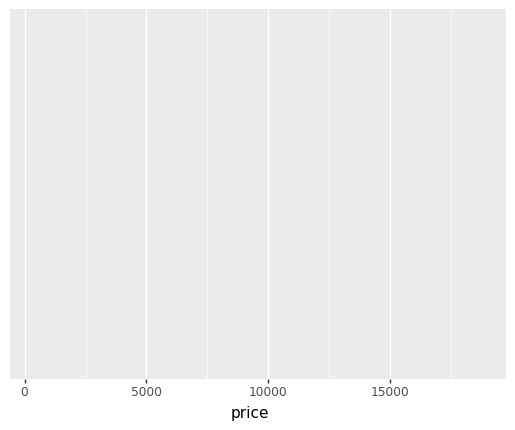

<ggplot: (91040541224)>

In [5]:
g1 = ggplot(aes(x='price'), data=plotnine_diamonds)
g1

Perceba como essa primeira parte da construção do gráfico não está utilizando a componente **<'GEOM_FUNCAO'>**. Somente está sendo delimitado que a variável 'price' irá aparecer no eixo 'x'. Por conta disso, nenhum gráfico foi plotado.

## 1.2 Histograma

Para a construção de um histograma, basta acrescentar ao mapeamento armazenado no objeto 'g1' a função **geom_histogram()**. No exemplo abaixo, três elementos adicionais foram acrescentados a função **geom_histogram()** sendo:

- **col:** Cor de Contorno
- **fill:** Cor de Preenchimento
- **alpha:** Quandidade desejada de transparência

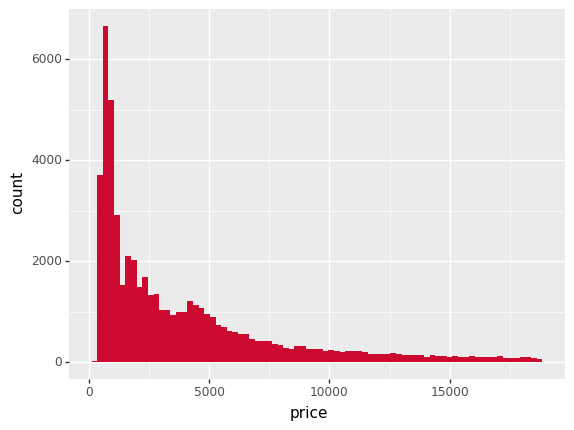

<ggplot: (91040697573)>

In [6]:
g2_1 = ggplot(aes(x='price'), data=plotnine_diamonds) + \
        geom_histogram(fill='#CC092F')
g2_1

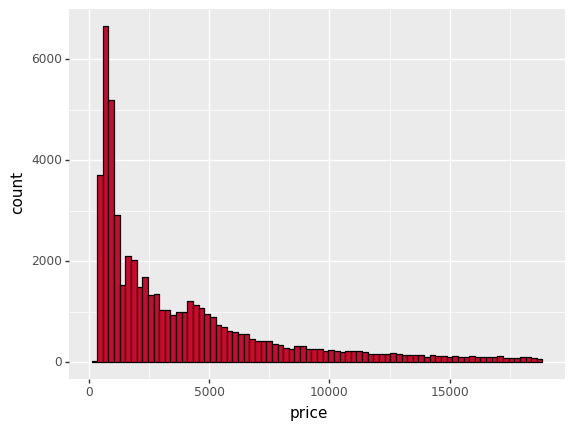

<ggplot: (91040633158)>

In [7]:
g2_2 = ggplot(aes(x='price'), data=plotnine_diamonds) + \
        geom_histogram(fill='#CC092F',color='black')
g2_2

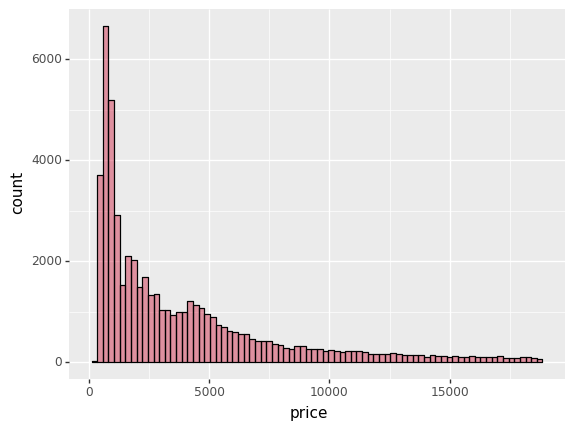

<ggplot: (91040633576)>

In [8]:
g2_3 = ggplot(aes(x='price'), data=plotnine_diamonds) + \
        geom_histogram(fill='#CC092F',color='black',alpha=0.4)
g2_3

Além desses elementos mencionados, também é possível adicionar outros elementos específicos para cada tipo de **geom**. Como exemplo, o argumento 'bins' do **geom_histogram()** controla o número de barras será modificado.

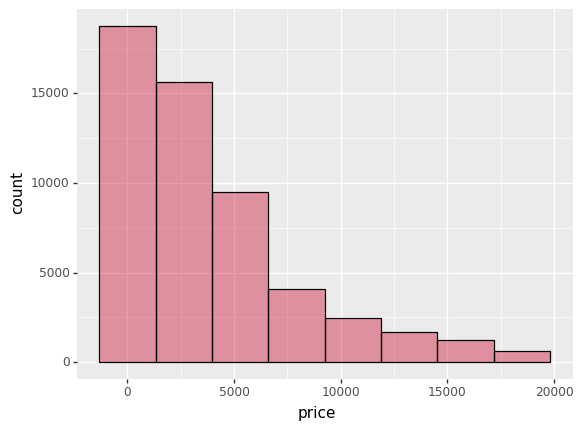

<ggplot: (91040683593)>

In [9]:
g2_4 = ggplot(aes(x='price'), data=plotnine_diamonds) + \
        geom_histogram(fill='#CC092F',color='black',alpha=0.4,bins=8)
g2_4

Como curiosidade, também foi adicionada a função **geom_rug()**. Essa função basicamente cria linhas abaixo do gráfico para cada observação dentro das faixas de valores definidas pelo histograma.

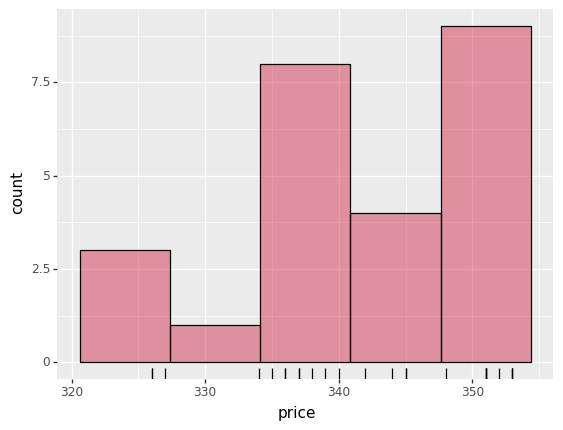

<ggplot: (91040633323)>

In [10]:
g2_5 = ggplot(aes(x='price'), data=plotnine_diamonds.head(25)) + \
        geom_histogram(fill='#CC092F',color='black',alpha=0.4,bins=5) + \
        geom_rug()
g2_5

## 1.3 Densidade

Para construir um gráfico de densidade no plotnine, basta adicionar a função **geom_density()** à estrutura mapeada anteriormente. Novamente, adicionamos a função 'geom_rug'.

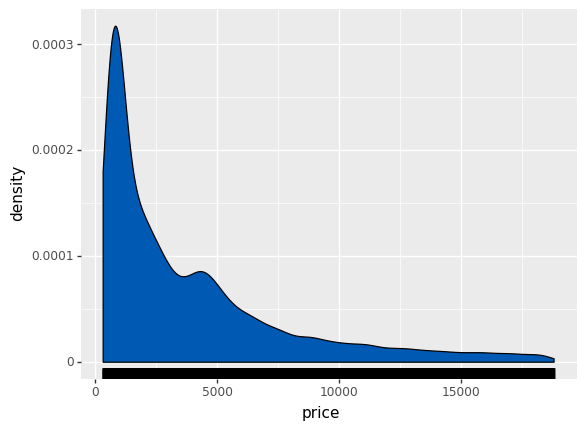

<ggplot: (91040766952)>

In [11]:
g3_1 = ggplot(aes(x='price'), data=plotnine_diamonds) + geom_density(fill='#0059b3') + geom_rug()
g3_1

## 1.4 Boxplot

Pensando em análise univariada (uma variável), também é possível criar boxplots pelo pacote. Entretanto, o mapeamento deve ser alterado do eixo 'x' (que foi utilizado no histograma e no gráfico de densidade) para o eixo 'y' e em 'x' é necessário colocar o número 1.

Como curiosidade, também foram adicionadas as funções **xlab()** (Alterar o nome do eixo x), **coord_flip()** (Girar o gráfico) e **ggtitle()** (Adicionar um título). 

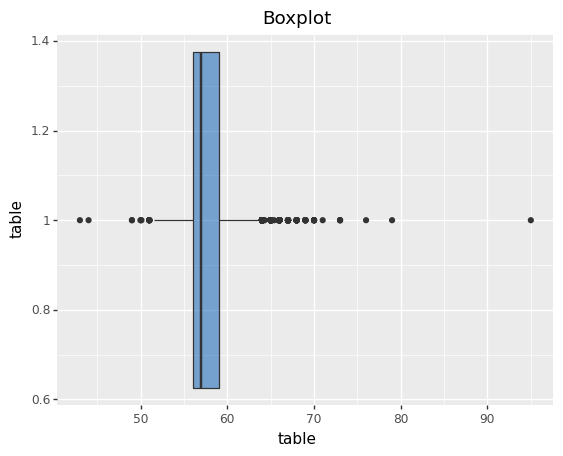

<ggplot: (91048116065)>

In [12]:
g4_1 = ggplot(aes(x=1,y='table'), data=plotnine_diamonds) + \
        geom_boxplot(fill='#0059b3',alpha=0.5) + \
        xlab('table') + \
        coord_flip() + \
        ggtitle('Boxplot')
g4_1

Quando o assunto é análise bivariada(duas variáveis), podemos adicionar uma nova variável no eixo 'x' e fazer um boxplot para cada nível dessa variável.

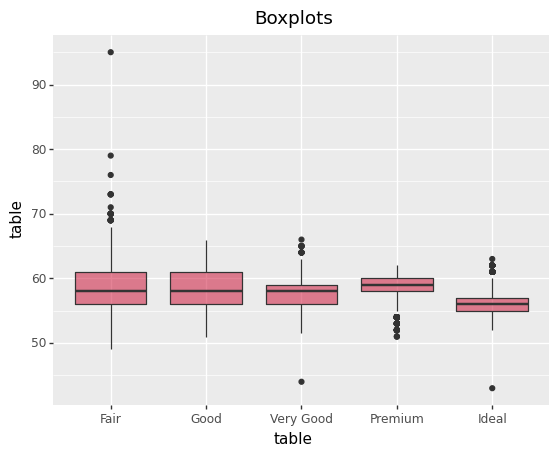

<ggplot: (91048115387)>

In [13]:
g4_3 = ggplot(aes(x='cut',y='table'), data=plotnine_diamonds) + \
        geom_boxplot(fill='#CC092F',alpha=0.5) + \
        xlab('table') + \
        ggtitle('Boxplots')
g4_3

Também podemos modificar as cores de contorno ou de preenchimento por essa mesma variável

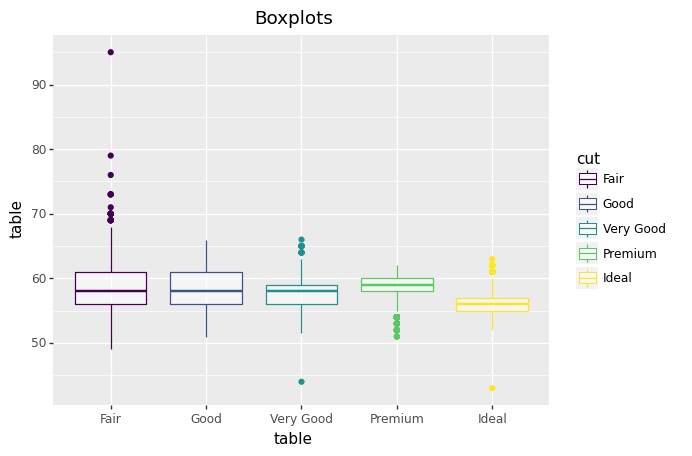

<ggplot: (91040997858)>

In [14]:
g4_4 = ggplot(aes(x='cut',y='table',color='cut'), data=plotnine_diamonds) + \
        geom_boxplot(alpha=0.5) + \
        xlab('table') + \
        ggtitle('Boxplots')
g4_4

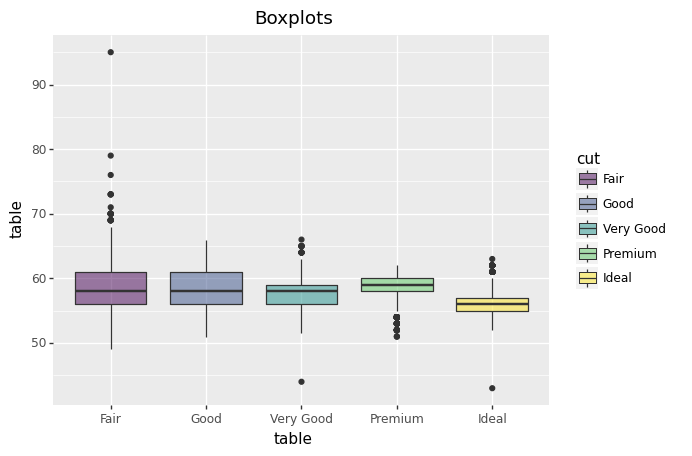

<ggplot: (91044453732)>

In [15]:
g4_5 = ggplot(aes(x='cut',y='table',fill='cut'), data=plotnine_diamonds) + \
        geom_boxplot(alpha=0.5) + \
        xlab('table') + \
        ggtitle('Boxplots')
g4_5

In [16]:
plotnine_diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## 1.5 Gráfico de Barras

Um gráfico de barras pode ser utilizado quando desejamos observar as frequências absolutas/relativas de uma variável [**geom_bar()**] ou quando desejamos utilizar a altura das barras para representar outros valores [**geom_col()**].

Esse tipo de gráfico necessita de um mapeamento com pelo menos duas variáveis, sendo uma no eixo 'x' (Variável sendo observada) e outra no eixo 'y' (Frequência Absoluta ou Frequência Relativa)

### geom_bar()

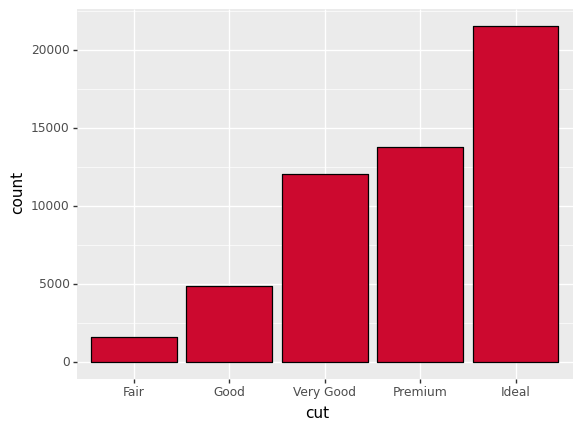

<ggplot: (91044450838)>

In [17]:
g5_1 = ggplot(plotnine_diamonds,aes(x='cut')) + \
        geom_bar(fill='#CC092F',color='black')
g5_1

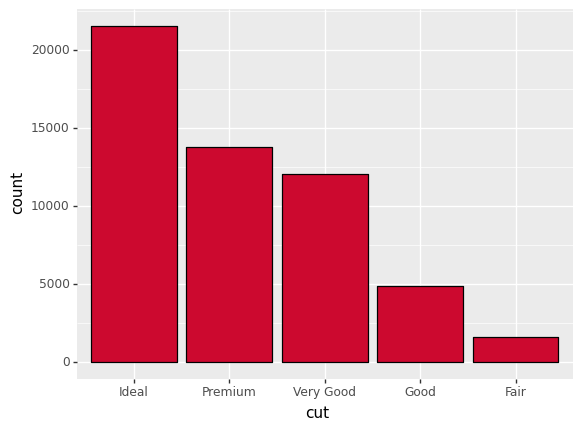

<ggplot: (91040692182)>

In [18]:
g5_2 = ggplot(plotnine_diamonds,aes(x='cut')) + \
        geom_bar(fill='#CC092F',color='black') + \
        scale_x_discrete(limits=plotnine_diamonds['cut'].value_counts().index.tolist())
g5_2

### geom_col()

In [19]:
diamonds_sum = plotnine_diamonds.groupby('color')['price'].sum().reset_index(name='sum')
diamonds_sum = diamonds_sum.sort_values(by='sum')
diamonds_sum

,color,sum
6,J,14949281
0,D,21476439
5,I,27608146
1,E,30142944
2,F,35542866
4,H,37257301
3,G,45158240


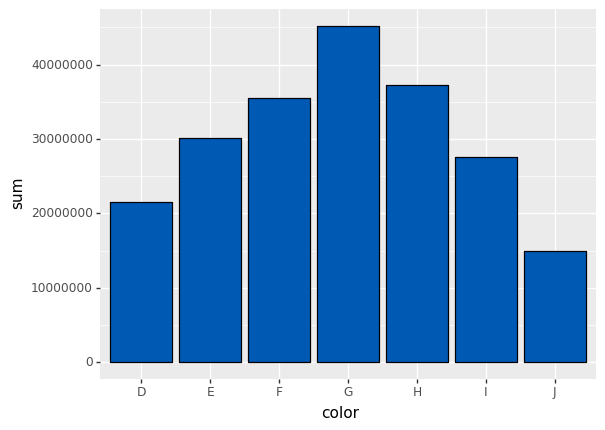

<ggplot: (91040697471)>

In [20]:
g5_3 = ggplot(diamonds_sum,aes(x='color',y='sum')) + \
        geom_col(fill='#0059b3',color='black')
g5_3

In [21]:
plotnine_diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [29]:
diamonds_sum_group = plotnine_diamonds.groupby(['color','cut'])['price'].sum().reset_index()
diamonds_sum_group

,color,cut,price
0,D,Fair,699443
1,D,Good,2254363
2,D,Very Good,5250817
3,D,Premium,5820962
4,D,Ideal,7450854
5,E,Fair,824838
6,E,Good,3194260
7,E,Very Good,7715165
8,E,Premium,8270443
9,E,Ideal,10138238


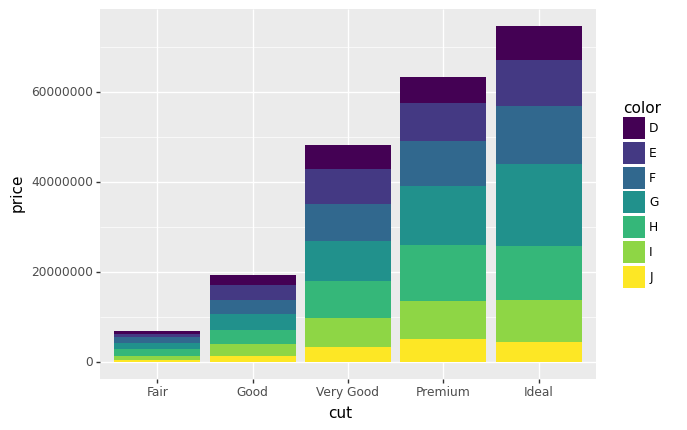

<ggplot: (91040619894)>

In [41]:
g5_3 = ggplot(diamonds_sum_group,aes(x='cut',y='price',fill='color')) + \
        geom_col(stat="identity")
g5_3

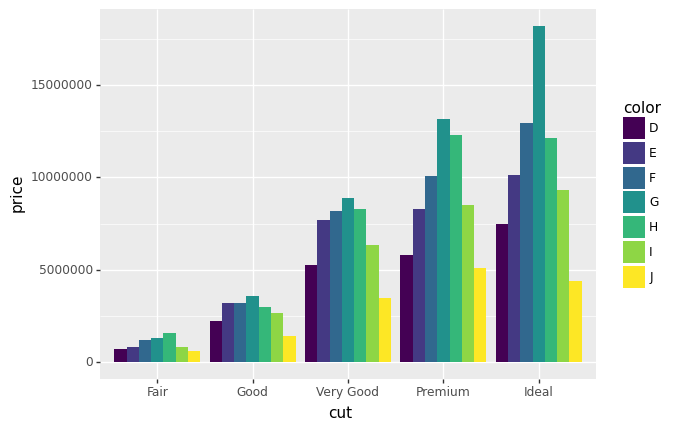

<ggplot: (91040651289)>

In [42]:
g5_3 = ggplot(diamonds_sum_group,aes(x='cut',y='price',fill='color')) + \
        geom_col(position="dodge", stat="identity")
g5_3

In [4]:
diamonds_count = plotnine_diamonds.groupby('clarity')['clarity'].count().reset_index(name='count')
diamonds_count['percentage'] = round((diamonds_count['count']/sum(diamonds_count['count']))*100,1).astype(str) + '%'
diamonds_count = diamonds_count.sort_values(by='count')
diamonds_count_order = plotnine_diamonds['clarity'].value_counts().index.tolist()
diamonds_count

,clarity,count,percentage
0,I1,741,1.4%
7,IF,1790,3.3%
6,VVS1,3655,6.8%
5,VVS2,5066,9.4%
4,VS1,8171,15.1%
1,SI2,9194,17.0%
3,VS2,12258,22.7%
2,SI1,13065,24.2%


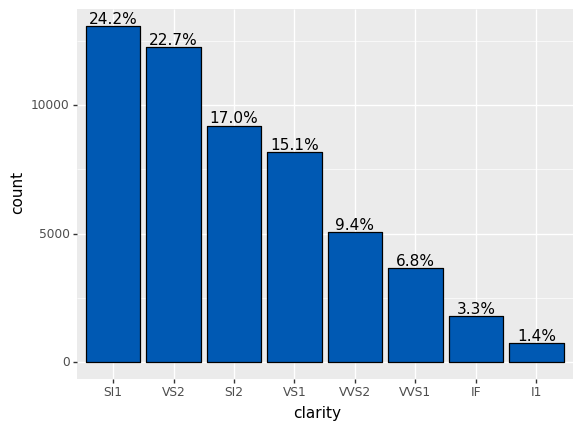

<ggplot: (145211872362)>

In [94]:
g5_4 = ggplot(diamonds_count,aes(x='clarity',y='count',label='percentage')) + \
        geom_col(fill='#0059b3',color='black') + \
        geom_text(va='bottom') + \
        scale_x_discrete(limits=diamonds_count_order)
g5_4

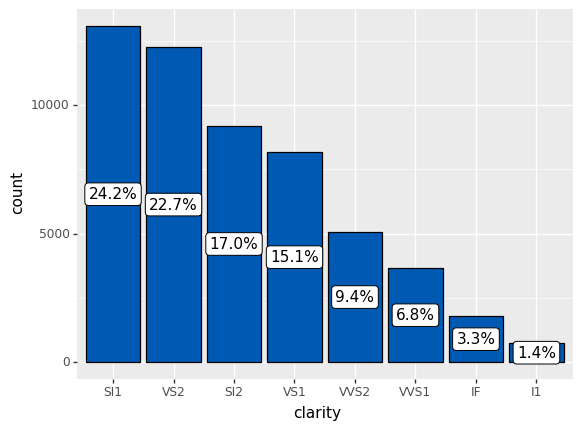

<ggplot: (145207887803)>

In [128]:
g5_5 = ggplot(diamonds_count,aes(x='clarity',y='count',label='percentage')) + \
        geom_col(fill='#0059b3',color='black') + \
        geom_label(position = position_stack(vjust = 0.5)) + \
        scale_x_discrete(limits=diamonds_count_order)
g5_5

## 1.7 Gráfico de Dispersão

In [52]:
from plotnine.data import mpg as plotnine_mpg

In [53]:
plotnine_mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


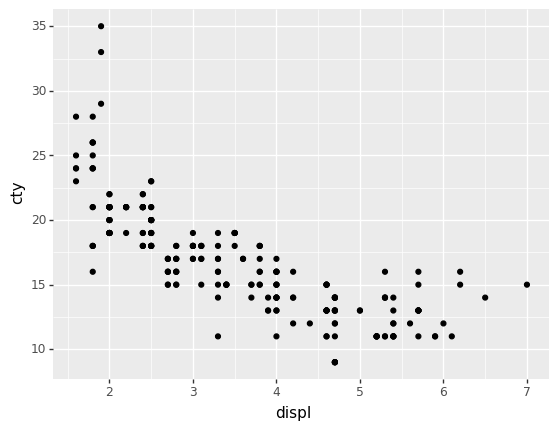

<ggplot: (91044437264)>

In [56]:
g7_1 = ggplot(plotnine_mpg,aes(x='displ',y='cty')) + \
        geom_point()
g7_1

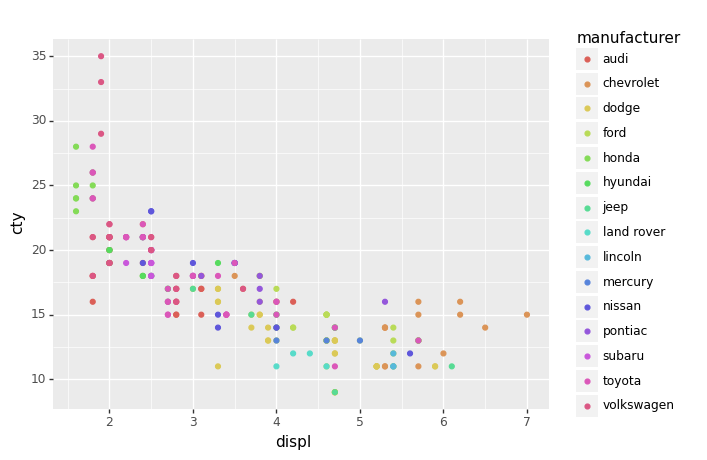

<ggplot: (91048118041)>

In [57]:
g7_2 = ggplot(plotnine_mpg,aes(x='displ',y='cty',color='manufacturer')) + \
        geom_point()
g7_2

In [68]:
!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=c0c04d29fd474227c68da73e86ec4d03198247dd238af97e70ebecb368f0f258
  Stored in directory: c:\users\joaom\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [69]:
import plotly.io as pio

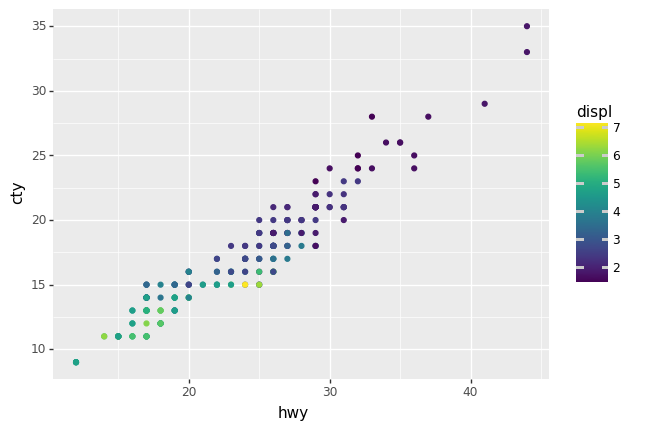

<ggplot: (91040633414)>

In [70]:
g7_3 = ggplot(plotnine_mpg,aes(x='hwy',y='cty',color='displ')) + \
        geom_point()
g7_3

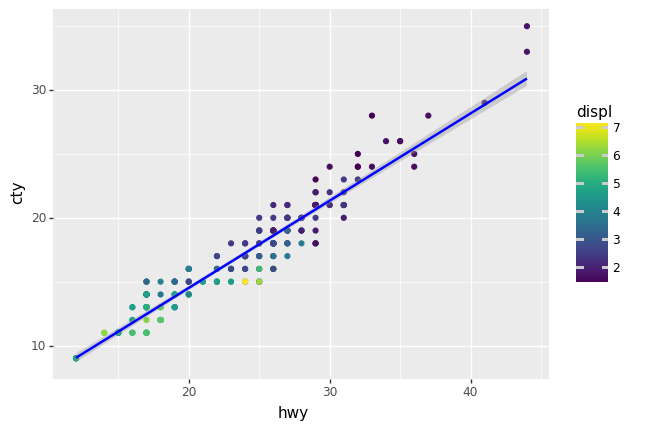

<ggplot: (91043251146)>

In [65]:
g7_4 = ggplot(plotnine_mpg,aes(x='hwy',y='cty',color='displ')) + \
        geom_point() + \
        geom_smooth(method = 'lm',color='blue')
g7_4

## 1.8 Explorando as outras camadas

## Referencias

https://www.amazon.com.br/Grammar-Graphics-Leland-Wilkinson/dp/0387245448
http://vita.had.co.nz/papers/layered-grammar.html
https://ggplot2.tidyverse.org/
http://ggplot.yhathq.com/
https://plotnine.readthedocs.io/en/stable/
https://medium.com/@gscheithauer/data-visualization-in-python-like-in-rs-ggplot2-bc62f8debbf5
https://www.curso-r.com/material/ggplot/
https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed
https://www.youtube.com/watch?v=pHrwqLhAaMw - (Greg Lamp - ggplot For Python)